<a href="https://colab.research.google.com/github/lvb86/Sirio_Libanes_ICU/blob/main/Leandro_Barbosa_v_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIRIO LIBANES ICU - Predict




#About
Neste caderno temos uma análise preditiva de nescessidade de internação em UTI com base em dados. 

Desenvolvido por Leandro Barbosa em 2021

Baseado desafio Kaggle:
[1]

e como atividade do curso Bootcamp Data Science Aplicada, promovido pela Alura [2]

# Especificações 

(Informaçoes transcritas de: [1]



## **Contexo**
A pandemia de COVID-19 atingiu o mundo inteiro, sobrecarregando os sistemas de saúde - despreparados para uma solicitação tão intensa e demorada de  leitos de UTI, profissionais, equipamentos de proteção individual e recursos de saúde.
O Brasil registrou o primeiro caso COVID-19 em 26 de fevereiro e atingiu a transmissão na comunidade em 20 de março.



## **Call to Action**
Há urgência na obtenção de dados precisos para melhor prever e preparar os sistemas de saúde e evitar colapsos, definido pela necessidade de leitos de UTI acima da capacidade (assumindo que recursos humanos, EPIs e profissionais estejam disponíveis), usando dados clínicos individuais - em vez de dados epidemiológicos e populacionais .



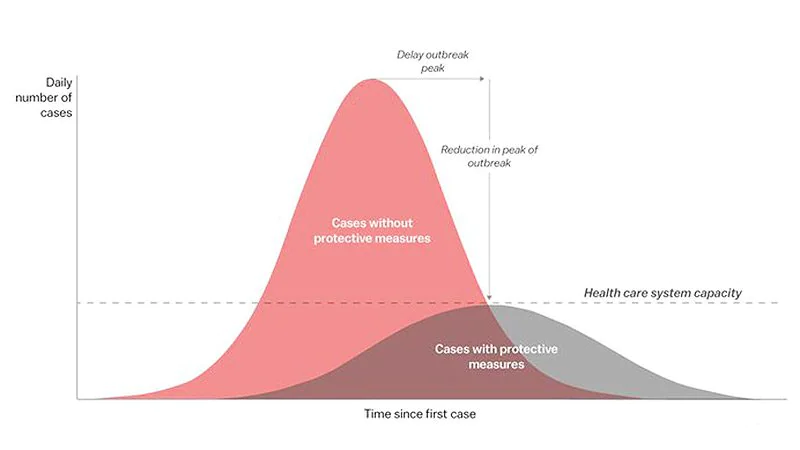





##**Tarefa 01**
Prever admissão na UTI de casos confirmados de COVID-19.
Com base nos dados disponíveis, é viável prever quais pacientes precisarão de suporte em unidade de terapia intensiva?
O objetivo é fornecer aos hospitais terciários e trimestrais a resposta mais precisa, para que os recursos da UTI possam ser arranjados ou a transferência do paciente possa ser agendada.




##**Tarefa 02**
Prever NÃO admissão à UTI de casos COVID-19 confirmados.
Com base na subamostra de dados amplamente disponíveis, é viável prever quais pacientes precisarão de suporte de unidade de terapia intensiva?
O objetivo é fornecer aos hospitais locais e temporários uma resposta boa o suficiente, para que os médicos de linha de frente possam dar alta com segurança e acompanhar remotamente esses pacientes.

##**Os dados**
###**Saída de etiqueta**
A UTI deve ser considerada, como primeira versão desse conjunto de dados, a variável de destino.

###**Conceito de janela**
Tivemos o cuidado de incluir cenários da vida real com janela de eventos e dados disponíveis.
Os dados foram obtidos e agrupados

* paciente
    - encontro com o paciente
    - agregado por janelas em ordem cronológica

Janela	|Descrição
---|---
0-2	|De 0 à 2 horas da admissão
2-4	|De 2 à 4 horas da admissão
4-6	|De 4 à 6 horas da admissão
6-12|De 6 à 12 horas da admissão
Above-12|Acima de 12 horas da admissão

* Cuidado para NÃO usar os dados quando a variável de destino estiver presente, pois a ordem do evento é desconhecida (talvez o evento de destino tenha acontecido antes de os resultados serem obtidos). Eles foram mantidos lá para que possamos aumentar este conjunto de dados em outros resultados posteriormente.

Exemplos:

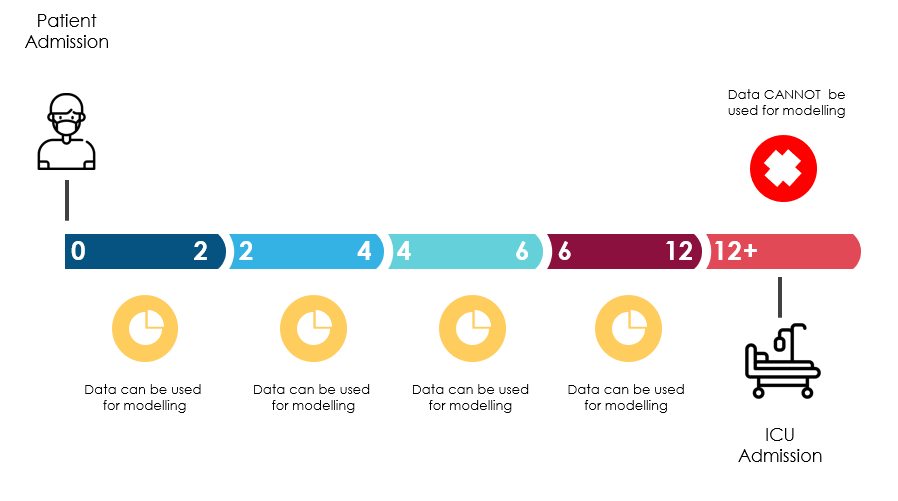




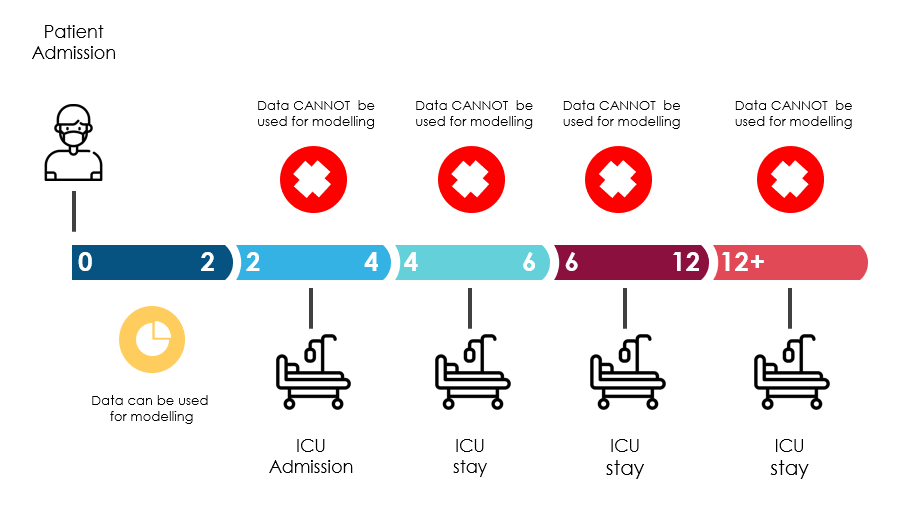

##**Dataset**
Este conjunto de dados contém dados anônimos do Hospital Sírio-Libanês, São Paulo e Brasília. Todos os dados foram tornados anônimos de acordo com as melhores práticas e recomendações internacionais.
Os dados foram limpos e escalados por coluna de acordo com Min Max Scaler para caber entre -1 e 1.



##**Dado disponível**
* Informações demográficas do paciente (03)
* Doenças anteriores agrupadas de pacientes (09)
* Resultados de sangue (36)
* Sinais vitais (06)

No total, são 54 recursos, expandidos quando pertinentes à média, mediana, máximo, mínimo, diferença e diferença relativa.

diff = max - min
diff relativo = diff / mediano

##Dicas & Truques


###Dados ausentes
Problema: um dos maiores desafios de trabalhar com dados de saúde é que a taxa de amostragem varia entre os diferentes tipos de medições. Por exemplo, os sinais vitais são coletados com mais frequência (geralmente de hora em hora) do que os laboratórios de sangue (geralmente diariamente).

Dicas e truques: É razoável supor que um paciente que não tem uma medição registrada em uma janela de tempo esteja clinicamente estável, apresentando potencialmente sinais vitais e exames de sangue semelhantes às janelas vizinhas. Portanto, pode-se preencher os valores ausentes usando a entrada seguinte ou anterior. Atenção aos problemas de multicolinearidade e variância zero nesses dados ao escolher seu algoritmo.

###Quanto mais cedo melhor!
>Problema: A identificação precoce dos pacientes que desenvolverão um curso adverso da doença (e precisam de cuidados intensivos) é a chave para um tratamento adequado (salvar vidas) e para gerenciar leitos e recursos.

> Dicas e truques: Enquanto um modelo preditivo usando todas as janelas de tempo provavelmente produzirá uma maior precisão, um bom modelo usando apenas o primeiro (0-2) provavelmente será mais clinicamente relevante. A criatividade é muito bem-vinda, sinta-se à vontade com a engenharia de recursos e as janelas de tempo. Atenção às medidas repetidas em indivíduos, uma vez que esses valores são (positivamente) correlacionados ao brincar com os dados.



##**Reconhecimento**
A Sociedade Beneficiente de Senhoras Sírio-Libanês está comprometida com a filantropia e a ciência para oferecer melhores resultados de saúde aos necessitados. Gostaríamos de agradecer especialmente a nossa equipe jurídica, nosso Instituto de Pesquisa e Educação e o Esquadrão de Arquitetura e Inteligência de Dados Clínico-Radiológicos.

# Declarações Globais 


Esse notebook foi desenvolvido na plataforma GOOGLE COLABORATORY
e além das bibliotecas pré instaladas foi utilizada a pycaret e pandas-profiling instaladas com pip.

In [1]:
pip install --upgrade pip

     |████████████████████████████████| 1.6MB 13.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
#!pip install tpot
!pip install pycaret -q
!pip install pandas-profiling
!pip install shap

     |████████████████████████████████| 261 kB 17.4 MB/s 
     |████████████████████████████████| 2.0 MB 29.3 MB/s 
     |████████████████████████████████| 14.2 MB 49.1 MB/s 
     |████████████████████████████████| 271 kB 67.3 MB/s 
     |████████████████████████████████| 6.8 MB 64.4 MB/s 
     |████████████████████████████████| 243 kB 63.0 MB/s 
     |████████████████████████████████| 167 kB 69.1 MB/s 
     |████████████████████████████████| 80 kB 10.8 MB/s 
     |████████████████████████████████| 1.3 MB 53.4 MB/s 
     |████████████████████████████████| 1.7 MB 56.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102 kB 64.5 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 61 kB 8.5 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |███████████████████

Import das bibliotecas utilizadas.

In [3]:
import matplotlib.pyplot as plt
import numpy   as np
import pandas  as pd
import seaborn as sns

from scipy                      import  interp

from sklearn.model_selection    import  cross_validate,          \
                                        GridSearchCV,            \
                                        learning_curve,          \
                                        train_test_split,        \
                                        RepeatedStratifiedKFold, \
                                        StratifiedKFold
#from sklearn.decomposition      import  PCA                                              

from sklearn.metrics            import  accuracy_score,          \
                                        auc,                     \
                                        classification_report,   \
                                        plot_confusion_matrix,   \
                                        roc_auc_score,           \
                                        roc_curve
                                        #precision_score,         \
                                        #recall_score,            \
                                        #f1_score,                \
                                        #classification_report,   \

from sklearn.preprocessing      import  LabelEncoder, \
                                        StandardScaler
#from sklearn.linear_model       import  LogisticRegression
#from sklearn.tree               import  DecisionTreeClassifier
#from sklearn.ensemble           import  RandomForestClassifier
from sklearn.ensemble           import  AdaBoostClassifier
from sklearn.pipeline           import  make_pipeline         
from joblib                     import  dump, load
# Auto UML
from pycaret.utils              import enable_colab 
from pycaret.classification     import *



In [4]:
#Habilitando modo colab da biblioteca COLAB
enable_colab()

Colab mode enabled.


In [5]:
# seed para repetibilidade
seed = 884653210
np.random.seed(seed)

#Dados

Importação dos dados disponibilizados.
Foi feita uma Cópia no GITHUB para garantir repetibilidade


In [6]:
url = 'https://github.com/lvb86/Sirio_Libanes_ICU/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true'
df  = pd.read_excel(url)

In [7]:
df['ICU'].value_counts()

0    1410
1     515
Name: ICU, dtype: int64

Como a saída nunca é nula não precisamos nos preocupar ao preencher os valores nulos

In [8]:
df.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0             NaN           NaN          NaN   
1                0.0    1.0             NaN           NaN          NaN   
2                0.0    1.0        0.605263      0.605263     0.605263   
3                0.0    1.0             NaN           NaN          NaN   
4                0.0    1.0        0.000000      0.000000     0.000000   

   ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0          NaN           NaN                 NaN               NaN   
1          NaN           NaN                 NaN               NaN   
2     0.605263          -1.0           -1.000000         -1.000000   
3          NaN           NaN                 NaN               NaN   
4     0.000000          -1.0           -0.871658         -0.871658   

   BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
0              NaN              NaN               NaN               NaN   
1              NaN              NaN               NaN               NaN   
2        -1.000000        -1.000000              -1.0         -1.000000   
3              NaN              NaN               NaN               NaN   
4        -0.871658        -0.871658              -1.0         -0.863874   

   BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0             NaN            NaN            NaN             NaN   
1             NaN            NaN            NaN             NaN   
2       -1.000000      -1.000000      -1.000000            -1.0   
3             NaN            NaN            NaN             NaN   
4       -0.863874      -0.863874      -0.863874            -1.0   

   BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  \
0                  NaN                NaN               NaN               NaN   
1                  NaN                NaN               NaN               NaN   
2            -0.317073          -0.317073         -0.317073         -0.317073   
3                  NaN                NaN               NaN               NaN   
4            -0.317073          -0.317073         -0.317073         -0.317073   

   BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  BIC_VENOUS_MIN  \
0                NaN                NaN              NaN             NaN   
1                NaN                NaN              NaN             NaN   
2               -1.0          -0.317073        -0.317073       -0.317073   
3                NaN                NaN              NaN             NaN   
4               -1.0          -0.414634        -0.414634       -0.414634   

   BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  BILLIRUBIN_MEAN  \
0             NaN              NaN                NaN   

## Qual Janela ? 

>1ª ? 

>> Se pegar a primeira janela teriamos a tendido o requisito de quanto antes melhor. 
>> mas talvez o paciente não tenha piorado o suficiente para preditor pegá-lo 

>ultima ? 
>> não atenderia o critério do quanto antes melhor mas poderia ficar mais claro prever nescessidade 

> média ? 
>>Agrupar pela média pode ser uma saída para considerar cada paciente. em todas as janelas e mesmo se tiver apenas um dado poderia ser considerado.

Para essa análise considerou-se mais significativa a utilização da média.

##Limpeza de dados:

##Função para limpesa e ajuste dos dados
* Preenchendo os dados ausentes com o método "fillna" seguindo a sugestão do Sirio [1]
* Limpando e agrupando com Método adaptado de Alura[3]

In [9]:
def preenche_tabela(d):
    
    PATIENT_ICU = d[['PATIENT_VISIT_IDENTIFIER','ICU']].\
                groupby(['PATIENT_VISIT_IDENTIFIER']).max('ICU')
    ICU_DIC = PATIENT_ICU.reset_index().set_index(
        'PATIENT_VISIT_IDENTIFIER')['ICU'].to_dict()

    # Ajustando categoria 
    labelencoder = LabelEncoder()
    d["AGE_PERCENTIL"] = labelencoder.fit_transform(d["AGE_PERCENTIL"]) 
    
    # discarta coluna de janela
    d = d.drop(['WINDOW'], axis = 1)
    # remove janelas de UTI conforme especificado
    d = d.query('ICU ==0')

    # Separa colunas contínuos, e preenche ffill bfill
    d_continuas_col = d.iloc[:, 13:-1].columns
    d_continuas = d.\
        groupby('PATIENT_VISIT_IDENTIFIER',
                as_index=False)[d_continuas_col].fillna(
                    method='bfill').fillna(method='ffill')
    # Separa Categóricas sem tratamaneto 
    d_categoricas = d.iloc[:, :13]
    d_y = d.iloc[:, -1:]

    # reconstúi df
    df = pd.\
        concat([d_categoricas,
                d_continuas,
                d_y],
                ignore_index=True,axis=1)
    df.columns = d.columns
    df = df.dropna()
    df = df.groupby(df.columns[0:13].to_list(), as_index=False).mean()
    df = df.groupby('PATIENT_VISIT_IDENTIFIER',as_index=False).max()
    df['ICU'] = df['PATIENT_VISIT_IDENTIFIER'].map(ICU_DIC)
    
    # Reduzir dimensionalidade dropando features com alta correlação
    valor_corte = 0.95
    matrix_corr = df.iloc[:,4:-2].corr().abs()
    matrix_upper = matrix_corr.where(np.triu(np.ones(
                                    matrix_corr.shape), k=1).astype(np.bool))
    excluir = [coluna for coluna in matrix_upper.columns if any(
                                        matrix_upper[coluna] > valor_corte)]
    df = df.drop(excluir, axis=1)

    return df

In [10]:
# dl = dados Limpos
dl = preenche_tabela(df)
dl.describe()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL      GENDER  \
count                352.000000   352.000000     352.000000  352.000000   
mean                 192.818182     0.457386       4.278409    0.380682   
std                  110.763735     0.498890       2.886611    0.486246   
min                    0.000000     0.000000       0.000000    0.000000   
25%                   97.750000     0.000000       2.000000    0.000000   
50%                  191.500000     0.000000       4.000000    0.000000   
75%                  289.250000     1.000000       7.000000    1.000000   
max                  384.000000     1.000000       9.000000    1.000000   

       DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
count          352.000000          352.000000          352.000000   
mean             0.130682            0.025568            0.102273   
std              0.337532            0.158068            0.303438   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6         HTN  \
count          352.000000          352.000000          352.000000  352.000000   
mean             0.022727            0.136364            0.053977    0.227273   
std              0.149245            0.343663            0.226295    0.419667   
min              0.000000            0.000000            0.000000    0.000000   
25%              0.000000            0.000000            0.000000    0.000000   
50%              0.000000            0.000000            0.000000    0.000000   
75%              0.000000            0.000000            0.000000    0.000000   
max              1.000000            1.000000            1.000000    1.000000   

       IMMUNOCOMPROMISED       OTHER  ALBUMIN_MEDIAN  ALBUMIN_DIFF  \
count         352.000000  352.000000      352.000000         352.0   
mean            0.167614    0.985795        0.569250          -1.0   
std             0.374055    0.118502        0.129579           0.0   
min             0.000000    0.000000       -0.578947          -1.0   
25%             0.000000    1.000000        0.605263          -1.0   
50%             0.000000    1.000000        0.605263          -1.0   
75%             0.000000    1.000000        0.605263          -1.0   
max             1.000000    1.000000        1.000000          -1.0   

       BE_ARTERIAL_MEDIAN  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_DIFF  \
count          352.000000             352.0        352.000000           352.0   
mean            -0.998556              -1.0         -0.966385            -1.0   
std              0.014109               0.0          0.095538             0.0   
min             -1.000000              -1.0         -1.000000            -1.0   
25%             -1.000000              -1.0         -1.000000            -1.0   
50%             -1.000000              -1.0         -1.000000            -1.0   
75%             -1.000000              -1.0         -1.000000            -1.0   
max             -0.786096              -1.0         -0.204188            -1.0   

       BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  \
count           352.000000              352.0         352.000000   
mean             -0.318782               -1.0          -0.322131   
std               0.026104                0.0           0.083041   
min              -0.756098               -1.0          -1.000000   
25%              -0.317073               -1.0          -0.317073   
50%              -0.317073               -1.0          -0.317073   
75%              -0.317073               -1.0          -0.317073   
max              -0.219512               -1.0           0.024390   

     

In [11]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 351
Columns: 110 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(105), int64(5)
memory usage: 305.2 KB


# Machine Learning


###Tain test split e Cross Validation

Para aleatorizar os dados os mesmos forma embralhados e em seguida separados em dados de teste e treino. 

também foi adotada uma estratégia de validação cruzada com a utilização da biblioteca RepeatedStratifiedKFold que será utilizada implementada sempre que possível.

In [12]:
ds = dl.sample(frac=1).reset_index(drop=True)   #Embaralhando dados

X = ds.drop(['ICU'], axis=1)
y = ds['ICU']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.2, random_state=seed)

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10)
    

Separação dos dados para cross validation

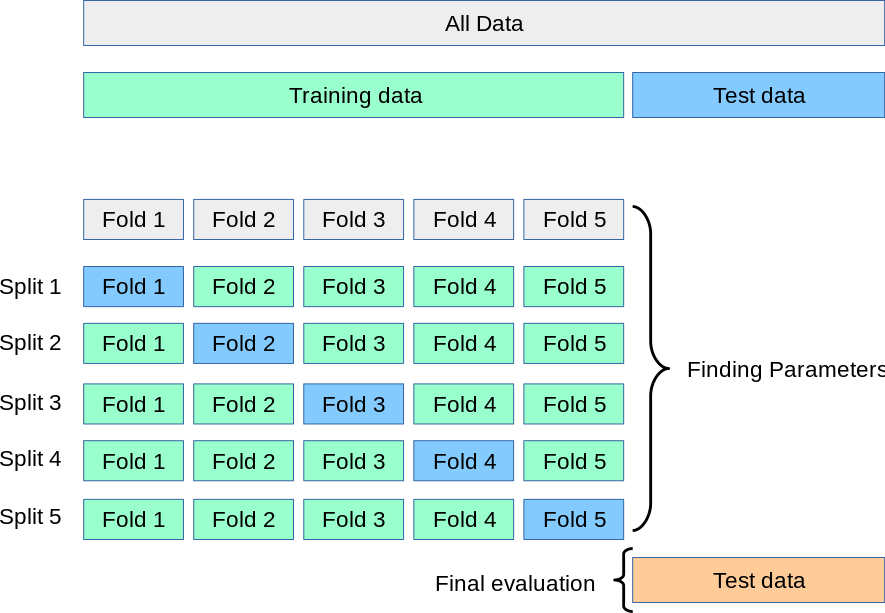

## Pycaret

"Machine learnin exploratório"
para uma primeira abordagem de qual estratégia utilizar foi empregada a bibliotec a pycaret. para testar os principais classificadores e parâmetos.
para garantir a aleatoridade dos dados foi utilizada tanto na pycaret 

A Biblioteca Pycaret faz uma análise entre varias estratégias de machine learning
usando tutorial [4]

In [13]:
clf = setup(dl,
            target='ICU',               #Alvo
            session_id=seed,            #Randon State
            use_gpu=True,               #Força GPU
            n_jobs=-1,                  #-1 Paralelismo máximo
            #pca = True,                 # Redução de dimensioinalidade PCA
            #pca_method = 'kernel',      
            data_split_stratify = True,  # Força a extratificação do "y"
            silent = True,
            )

Description             Value
0                               session_id         884653210
1                                   Target               ICU
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data        (352, 110)
5                           Missing Values             False
6                         Numeric Features                97
7                     Categorical Features                12
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (246, 117)
12                    Transformed Test Set        (106, 117)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test              True
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU              True
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              cd35
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52                Feature Selection Method           classic
53            Features Selection Threshold              None
54                     Feature Interaction             False
55                           Feature Ratio             False
56                   Interaction Threshold              None
57                           Fix Imbalance             False
58                    Fix Imbalance Method             SMOTE

Abaixo temos uma tabela comparativa com os principais métodos de Machine learning
onde podemos observar que a varias métricas de desempenho.

conforme [5]
O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.

então utilizaremos recall para escolher o com menor numero de falsos positivos.

já que nossa meta é a preservação da vida.! 

(Num scenário de escassez de recursos poderia se optar por uma métrica de menor número de falsos positivos. mas teriamos um dilema moral a tratar.)


In [14]:
compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9310  0.9832  0.8871  0.9655   
gbc          Gradient Boosting Classifier    0.9223  0.9767  0.8591  0.9717   
ada                  Ada Boost Classifier    0.9143  0.9735  0.8682  0.9461   
rf               Random Forest Classifier    0.9103  0.9854  0.8492  0.9567   
et                 Extra Trees Classifier    0.8777  0.9817  0.7985  0.9393   
lr                    Logistic Regression    0.8620  0.9123  0.8424  0.8735   
dt               Decision Tree Classifier    0.8617  0.8606  0.8591  0.8542   
ridge                    Ridge Classifier    0.8453  0.0000  0.7886  0.8835   
lda          Linear Discriminant Analysis    0.8287  0.8661  0.8152  0.8288   
nb                            Naive Bayes    0.7435  0.8431  0.6371  0.7778   
qda       Quadratic Discriminant Analysis    0.6665  0.6434  0.3318  0.9008   
svm                   SVM - Linear Kernel    0.5120  0.0000  0.3909  0.1873   
knn                K Neighbors Classifier    0.4722  0.4441  0.3871  0.4212   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9225  0.8606  0.8659     0.079  
gbc       0.9077  0.8418  0.8508     0.291  
ada       0.9024  0.8264  0.8327     0.154  
rf        0.8949  0.8175  0.8270     0.842  
et        0.8563  0.7515  0.7675     0.810  
lr        0.8485  0.7220  0.7354     0.175  
dt        0.8541  0.7221  0.7259     0.018  
ridge     0.8226  0.6865  0.7014     0.038  
lda       0.8172  0.6557  0.6618     0.033  
nb        0.6893  0.4762  0.4913     0.015  
qda       0.4525  0.2968  0.3756     0.032  
svm       0.2532 -0.0013 -0.0025     0.015  
knn       0.4013 -0.0673 -0.0686     0.168

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=884653210, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

###A Matriz de confusão



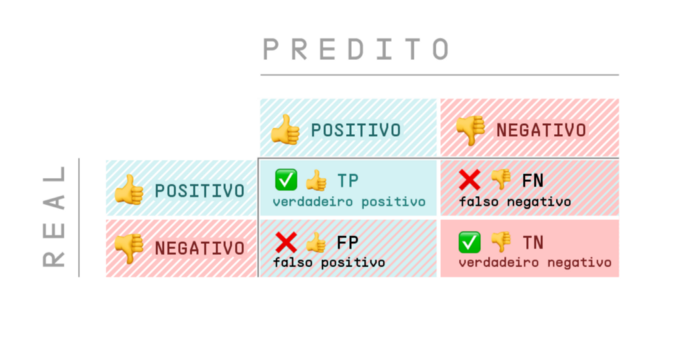

Uma forma bastante simples de visualizar a performance de um modelo de classificação é através de uma matriz de confusão. Esta matriz indica quantos exemplos existem em cada grupo:
* falso positivo (FP),
* falso negativo (FN), 
* verdadeiro positivo (TP) e 
* verdadeiro negativo (TN).

É interessante visualizar a contagem destes grupos tanto em números absolutos quanto em porcentagens da classe real, já que o número de exemplos em cada classe pode variar.

A matriz de confusão permite visualizar facilmente quantos exemplos foram classificados corretamente e erroneamente em cada classe, que ajuda a entender se o modelo está favorecendo uma classe em detrimento da outra. Isto é importante principalmente em situações em que os erros possuem custos diferentes.
No nosso caso de um modelo para classificar quem vai ou não para UTI para tratar COVID-19

Impactos: 
> **Um erro por falso positivo:**
(classificar uma paciente como doente enquanto ela está saudável) seria inconveniente dado que ela demoraria mais a receber alta e utilizar um recurso escasso.

> **Um erro por falso negativo:**
(classificar uma paciente como saudável enquanto ela está doente) seria bem mais grave, dado que ela poderia receber alta e não ter o acompanhamento necessário.

texto adaptado de [6]

para verificar este resultado vamos avaliar as primieras 4 soluções que performaram com recall maior que 0,8, avaliando a matriz de confusão destes.



In [15]:
maquinas = ['lightgbm','gbc','ada','rf','et','lr','dt','ridge','lda','nb','qda','svm','knn']

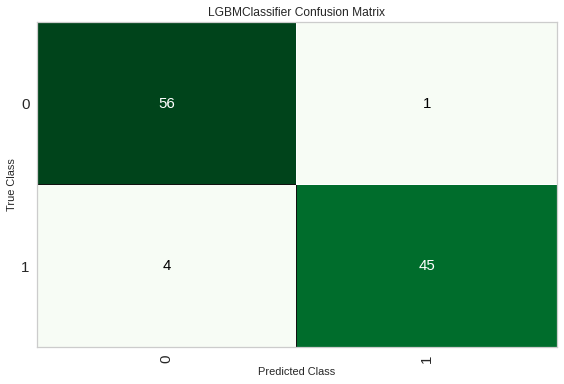

In [16]:
model = create_model(maquinas[0])
plot_model(model, 'confusion_matrix')

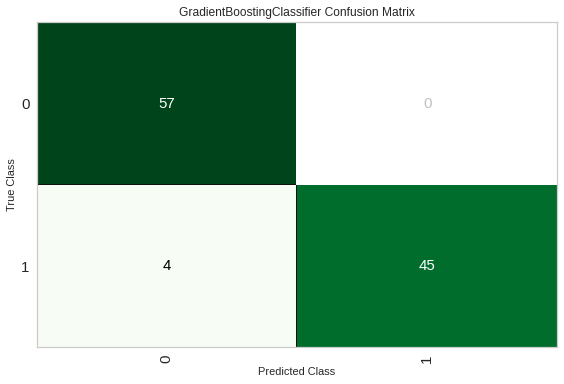

In [17]:
model = create_model(maquinas[1])
plot_model(model, 'confusion_matrix')

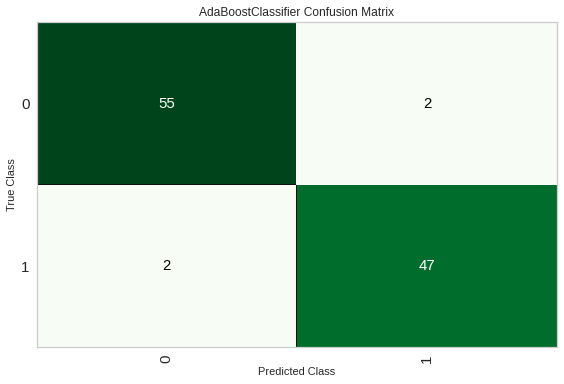

In [18]:
model = create_model(maquinas[2])
plot_model(model, 'confusion_matrix')

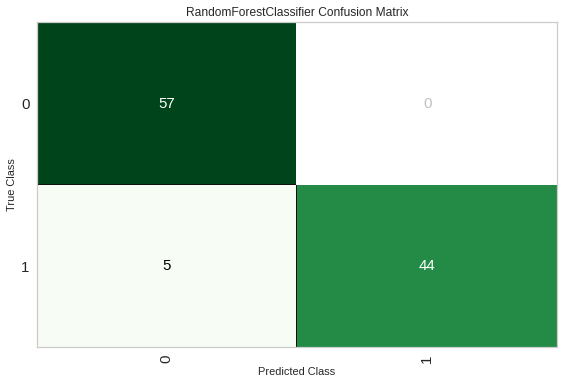

In [19]:
model = create_model(maquinas[3])
plot_model(model, 'confusion_matrix')

### Escolha do modelo
Como o modelo **Ada Boost Classifier** Apresentou o menor número falsos negativos, seguiremos com este modelo.

In [20]:
model = create_model(maquinas[2])

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9600  0.9872  0.9167  1.0000  0.9565  0.9196  0.9226
1       0.9600  1.0000  0.9167  1.0000  0.9565  0.9196  0.9226
2       0.8800  0.9808  0.9167  0.8462  0.8800  0.7604  0.7628
3       0.8400  0.8974  0.7500  0.9000  0.8182  0.6774  0.6864
4       0.9600  1.0000  0.9091  1.0000  0.9524  0.9180  0.9211
5       0.9600  0.9675  0.9091  1.0000  0.9524  0.9180  0.9211
6       0.9167  0.9790  0.9091  0.9091  0.9091  0.8322  0.8322
7       0.8333  0.9790  0.7273  0.8889  0.8000  0.6596  0.6693
8       0.8750  0.9441  0.7273  1.0000  0.8421  0.7429  0.7687
9       0.9583  1.0000  1.0000  0.9167  0.9565  0.9167  0.9199
Mean    0.9143  0.9735  0.8682  0.9461  0.9024  0.8264  0.8327
SD      0.0501  0.0302  0.0912  0.0567  0.0596  0.1018  0.0982

### A Curva ROC
A sigla ROC significa “Receiver Operating Characteristic” e demonstra a capacidade do modelo em distinguir corretamente duas categorias, portanto utilizado para classificação. Para plotarmos a curva ROC é necessário calcular as probabilidades de cada observação pertencer a classe em questão.

Uma vantagem da curva ROC é podermos observar o ponto de corte (onde o modelo fica estável) e otimizar o desempenho do mesmo, economizando recurso.

O ROC possui os seguintes parâmetros:

Sensibilidade
Especificidade
A curva ROC traça a Sensibilidade (Taxa de Verdadeiros Positivos) x Especificidade (Taxa de Falsos Positivos)

[7]

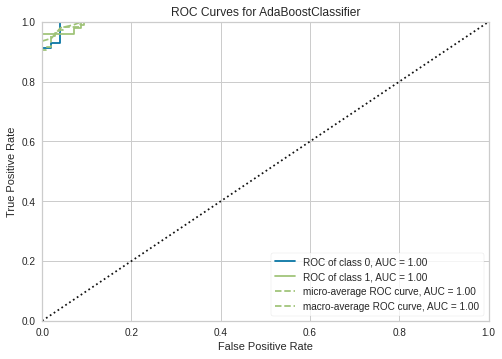

In [21]:
plot_model(model)

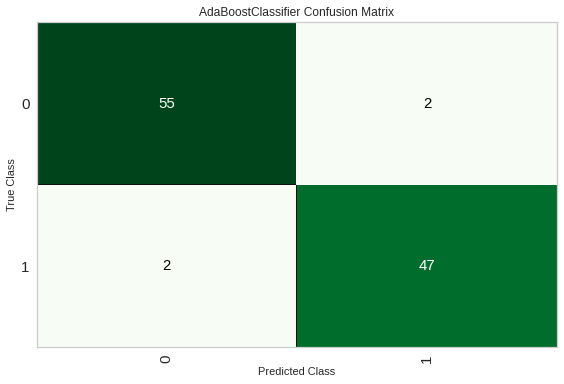

In [22]:
plot_model(model, 'confusion_matrix')

In [23]:
# interpret_model(model)
# This function only supports tree based models for binary classification: lightgbm, rf, dt, et.

In [24]:
predictions = predict_model(model)

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Ada Boost Classifier    0.9623  0.9968  ...  0.9592  0.9241  0.9241

[1 rows x 8 columns]

### Pipeline 

In [25]:
finalize_model(model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=884653210)

In [26]:
save_model(model, 'sirio_icu_ada')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='ICU',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('dummy', Dummify(target='ICU')),
                 ('fix_perfect', Remove_100(target='ICU')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', '

## Ada Boost Classifier

Avaliando parâmetros do Ada Boost Classifier

Função para testar modelos e explorar ajustes

In [27]:
def roda_modelo_cv(modelo, X, y, cv):
    np.random.seed(seed)

    resultados = cross_validate(modelo, X, y, cv=cv,
                                scoring=['roc_auc','precision','recall','f1'],
                                return_train_score = True)

    auc_test_score  = np.mean(resultados['test_roc_auc'     ])
    pre_test_score  = np.mean(resultados['test_precision'   ])
    rec_test_score  = np.mean(resultados['test_recall'      ])
    f1_test_score   = np.mean(resultados['test_f1'          ])
    
    auc_train_score  = np.mean(resultados['train_roc_auc'   ])
    pre_train_score  = np.mean(resultados['train_precision' ])
    rec_train_score  = np.mean(resultados['train_recall'    ])
    f1_train_score   = np.mean(resultados['train_f1'        ])
    
    print('valores médios de teste:\n',
          f'| ROC_AUC: {auc_test_score:.3}',
          f'| Precision: {pre_test_score:.3}',
          f'| Recall: {rec_test_score:.3}',
          f'| F1: {f1_test_score:.3}')

    #valores médios 
    return auc_test_score,  pre_test_score,  rec_test_score,  f1_test_score \
         , auc_train_score, pre_train_score, rec_train_score, f1_train_score

In [28]:
scores = ['roc_auc_test',  'precision_test', 'recall_test',  'f1_test' 
         , 'roc_auc_train', 'precision_train', 'recall_train', 'f1_train']

####Avaliando parâmetro: n_estimators

valores médios de teste:
 | ROC_AUC: 0.971 | Precision: 0.946 | Recall: 0.898 | F1: 0.92
valores médios de teste:
 | ROC_AUC: 0.977 | Precision: 0.946 | Recall: 0.903 | F1: 0.923
valores médios de teste:
 | ROC_AUC: 0.983 | Precision: 0.961 | Recall: 0.911 | F1: 0.934
valores médios de teste:
 | ROC_AUC: 0.985 | Precision: 0.963 | Recall: 0.914 | F1: 0.937
valores médios de teste:
 | ROC_AUC: 0.988 | Precision: 0.968 | Recall: 0.919 | F1: 0.942
valores médios de teste:
 | ROC_AUC: 0.988 | Precision: 0.973 | Recall: 0.921 | F1: 0.946
valores médios de teste:
 | ROC_AUC: 0.988 | Precision: 0.97 | Recall: 0.912 | F1: 0.939
valores médios de teste:
 | ROC_AUC: 0.988 | Precision: 0.97 | Recall: 0.916 | F1: 0.941
valores médios de teste:
 | ROC_AUC: 0.988 | Precision: 0.971 | Recall: 0.916 | F1: 0.942
valores médios de teste:
 | ROC_AUC: 0.989 | Precision: 0.972 | Recall: 0.916 | F1: 0.942


roc_auc_test  precision_test  ...  recall_train  f1_train
110      0.987931        0.973191  ...      1.000000  1.000000
90       0.987711        0.968290  ...      1.000000  1.000000
170      0.988035        0.971031  ...      1.000000  1.000000
190      0.988757        0.971965  ...      1.000000  1.000000
150      0.988331        0.970038  ...      1.000000  1.000000
70       0.985427        0.962693  ...      1.000000  1.000000
130      0.987845        0.970150  ...      1.000000  1.000000
50       0.982608        0.960975  ...      1.000000  1.000000
30       0.977414        0.946028  ...      1.000000  1.000000
10       0.970950        0.946425  ...      0.958119  0.972494

[10 rows x 8 columns]

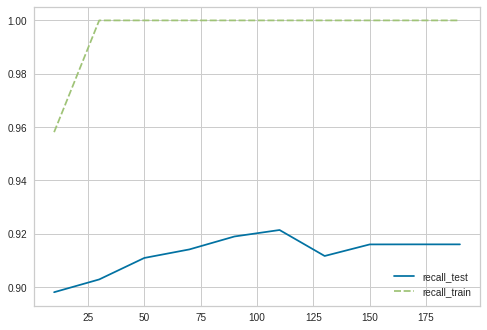

In [29]:
#Avaliando parâmetro: n_estimators
resultados = []
parametros = []
for i in range(10,200,20):
    clf_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1.0, n_estimators=i,
                                    random_state=seed)

    L=roda_modelo_cv(clf_ada,X,y,cv)
    resultados.append(L)
    parametros.append(i)
tune = pd.DataFrame(index = parametros, data = resultados, columns = scores)
display(tune.sort_values('recall_test',ascending=False))
sns.lineplot(data = tune[['recall_test','recall_train']])

O tem varialções significativas quanto ao número de estimadores

####Avaliando parâmetro: learning_rate

valores médios de teste:
 | ROC_AUC: 0.983 | Precision: 0.971 | Recall: 0.881 | F1: 0.922
valores médios de teste:
 | ROC_AUC: 0.987 | Precision: 0.971 | Recall: 0.904 | F1: 0.935
valores médios de teste:
 | ROC_AUC: 0.986 | Precision: 0.961 | Recall: 0.904 | F1: 0.93
valores médios de teste:
 | ROC_AUC: 0.984 | Precision: 0.961 | Recall: 0.914 | F1: 0.936
valores médios de teste:
 | ROC_AUC: 0.982 | Precision: 0.961 | Recall: 0.909 | F1: 0.933
valores médios de teste:
 | ROC_AUC: 0.981 | Precision: 0.957 | Recall: 0.903 | F1: 0.928
valores médios de teste:
 | ROC_AUC: 0.98 | Precision: 0.953 | Recall: 0.91 | F1: 0.93
valores médios de teste:
 | ROC_AUC: 0.976 | Precision: 0.939 | Recall: 0.895 | F1: 0.915
valores médios de teste:
 | ROC_AUC: 0.961 | Precision: 0.923 | Recall: 0.871 | F1: 0.894
valores médios de teste:
 | ROC_AUC: 0.838 | Precision: 0.572 | Recall: 0.87 | F1: 0.687


roc_auc_test  precision_test  ...  recall_train  f1_train
0.766667      0.984491        0.961386  ...      1.000000  1.000000
1.433333      0.979705        0.952535  ...      1.000000  1.000000
0.988889      0.981924        0.961143  ...      1.000000  1.000000
0.544444      0.985571        0.960798  ...      1.000000  1.000000
0.322222      0.986881        0.970926  ...      1.000000  1.000000
1.211111      0.981068        0.956569  ...      1.000000  1.000000
1.655556      0.975981        0.939276  ...      1.000000  1.000000
0.100000      0.982824        0.970817  ...      0.938494  0.967774
1.877778      0.960912        0.923323  ...      1.000000  1.000000
2.100000      0.838395        0.572043  ...      0.915270  0.726531

[10 rows x 8 columns]

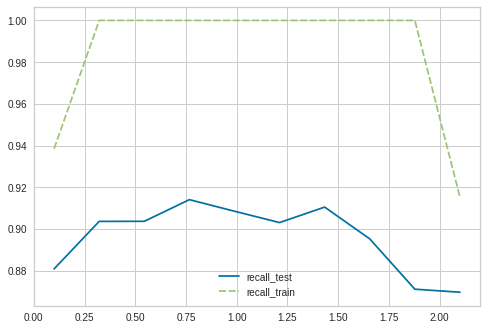

In [30]:
#Avaliando parâmetro: learning_rate
resultados = []
parametros = []
for i in np.linspace(0.1,2.1,10):
    clf_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=i, n_estimators=50,
                                    random_state=seed)

    L=roda_modelo_cv(clf_ada,X,y,cv)
    resultados.append(L)
    parametros.append(i)
tune = pd.DataFrame(index = parametros, data = resultados, columns = scores)
display(tune.sort_values('recall_test',ascending=False))
sns.lineplot(data = tune[['recall_test','recall_train']])

####Avaliando parâmetro: algorithm

valores médios de teste:
 | ROC_AUC: 0.984 | Precision: 0.961 | Recall: 0.897 | F1: 0.927
valores médios de teste:
 | ROC_AUC: 0.983 | Precision: 0.961 | Recall: 0.911 | F1: 0.934


roc_auc_test  precision_test  ...  recall_train  f1_train
SAMME.R      0.982608        0.960975  ...      1.000000  1.000000
SAMME        0.984294        0.961479  ...      0.999388  0.999693

[2 rows x 8 columns]

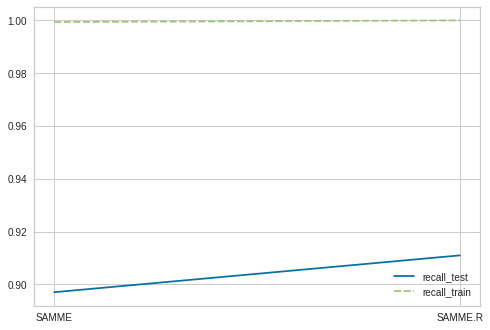

In [31]:
#Avaliando parâmetro: algorithm
resultados = []
parametros = []
for i in ['SAMME','SAMME.R']:
    clf_ada = AdaBoostClassifier(algorithm=i, base_estimator=None,
                                    learning_rate=1, n_estimators=50,
                                    random_state=seed)

    L=roda_modelo_cv(clf_ada,X,y,cv)
    resultados.append(L)
    parametros.append(i)
tune = pd.DataFrame(index = parametros, data = resultados, columns = scores)
display(tune.sort_values('recall_test',ascending=False))
sns.lineplot(data = tune[['recall_test','recall_train']])

#### Ajuste dos melhores parâmetros

In [32]:
#Melhores Parâmetros
clf_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=0.766667, n_estimators=110,
                                    random_state=seed)

L=roda_modelo_cv(clf_ada,X,y,cv)

valores médios de teste:
 | ROC_AUC: 0.987 | Precision: 0.966 | Recall: 0.919 | F1: 0.941


In [33]:
#Melhores Parâmetros
clf_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=0.766667, n_estimators=110,
                                    random_state=seed)

L=roda_modelo_cv(clf_ada,X,y,cv)

valores médios de teste:
 | ROC_AUC: 0.987 | Precision: 0.966 | Recall: 0.919 | F1: 0.941


###Ajuste fino via  Grid
Procurando ajuste fino, proximo dos melhores ajustes.

In [34]:
if 1==0:    #este processo demora em torno de 55min
    pipe_ada = make_pipeline(StandardScaler(),
                            AdaBoostClassifier(random_state=seed),
                            )

    param_grid = [{ 'adaboostclassifier__learning_rate': np.linspace(0.65,0.85),
                    'adaboostclassifier__n_estimators': range(100,121)}
                ]

    gs = GridSearchCV(estimator = pipe_ada,
                    param_grid = param_grid,
                    scoring='recall',
                    refit=True,
                    cv=10,
                    n_jobs=1)

    gs = gs.fit(X_train, y_train)

    print(gs.best_score_)
    print(gs.best_params_)

    # Ultimo resultado
    #0.9461538461538461
    #{'adaboostclassifier__learning_rate': 0.6826530612244898, 'adaboostclassifier__n_estimators': 100}

### Avaliação do ultimo Ajuste

Pipeline 

In [35]:
pipe_ada = make_pipeline(StandardScaler(),
                         #PCA(n_components=2),
                        AdaBoostClassifier(algorithm='SAMME.R',
                                           base_estimator=None,
                                           learning_rate=0.6826530612244898,
                                           n_estimators=100,
                                           random_state=seed))

L=roda_modelo_cv(pipe_ada,X,y,cv)

valores médios de teste:
 | ROC_AUC: 0.989 | Precision: 0.967 | Recall: 0.919 | F1: 0.942


Matriz Confusão

In [42]:
pipe_ada.fit(X=X_train,y=y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=0.6826530612244898,
                                    n_estimators=100,
                                    random_state=884653210))],
         verbose=False)

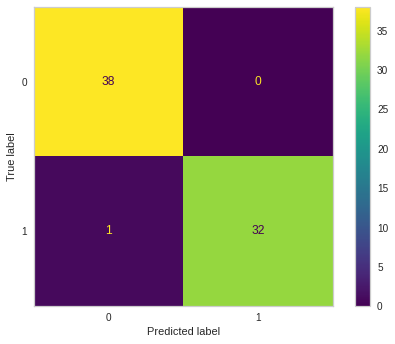

In [43]:
plot_confusion_matrix(pipe_ada, X_test, y_test)
plt.grid(False)

Curva ROC

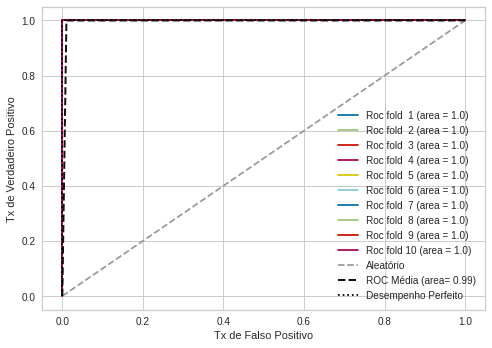

In [38]:
#Curva Roc Final

cv2 = list(StratifiedKFold(n_splits=10).split(X,y))
fig = plt.figure(figsize=(7,5))

mean_tpr =0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []
for i, (train, test) in enumerate(cv2):
    probas = pipe_ada.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,
                                    probas[:,1],
                                    pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr,tpr)

    plt.plot(fpr, tpr, label = f'Roc fold {i+1:2} (area = {roc_auc:.2})' )
plt.plot([0,1],[0,1],
         linestyle='--',
         color=(0.6,0.6,0.6),
         label = 'Aleatório')
mean_tpr /= len(cv2)
mean_tpr[-1] = 1.0

mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', 
         label= f'ROC Média (area= {mean_auc:.2})', lw=2)
plt.plot([0,0,1],[0,1,1], linestyle = ':',
         color = 'black', label='Desempenho Perfeito')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Tx de Falso Positivo')
plt.ylabel('Tx de Verdadeiro Positivo')

plt.legend(loc ='lower right')
plt.tight_layout()
plt.show();


Scores Finais

In [39]:
y_pred = pipe_ada.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.98        33

    accuracy                           0.99        71
   macro avg       0.99      0.98      0.99        71
weighted avg       0.99      0.99      0.99        71



## Conclusão e análise dos resultados
Com esses resultado, podemos concluir que obtivemos um excelente ajuste, o que poderia tambem indicar um possivel overfit, apesar das métricas de cross validation. 
Antes de colocar o modelo em produção recomenda-se a revisão e validação dos métodos aqui empregados avaliação por um profissional habilitado. e testes com novos dados.

##Pipeline de Saída
Repetindo os valores de saída para explicitar os resultados.

In [40]:
pipe_ada = make_pipeline(StandardScaler(),
                        AdaBoostClassifier(algorithm='SAMME.R',
                                           base_estimator=None,
                                           learning_rate=0.6826530612244898,
                                           n_estimators=100,
                                           random_state=seed))
pipe_ada.fit(X, y)

dump(pipe_ada, 'pipe_ada_LB.joblib')

['pipe_ada_LB.joblib']

# Referências

Referências Externas: 

>Repositório do Projeto
>>[0] https://github.com/lvb86/Sirio_Libanes_ICU/

>Desafio keaggele
>>[1] https://www.kaggle.com/S%C3%ADrio-Libanes/covid19

>Alura: 
>>[2] www.alura.com.br

>Exemplo Limpeza 
>>[3] https://github.com/alura-cursos/covid-19-clinical-2

>Exemplo Auto UML
>>[4] https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20Classification.ipynb

>Métricas 
>>[5] https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

>Matriz de Confusão
>>[6] https://medium.com/kunumi/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-em-machine-learning-classifica%C3%A7%C3%A3o-49340dcdb198

> Curva ROC
>>[7] https://mabittar.github.io/Metricas2/

#CONTATOS
*Autor*: Leandro Vargas Barbosa

*E-mail*: leandrovb@gmail.com

*Linkedin*: https://www.linkedin.com/in/leandrovb/

*GitHub*: https://github.com/lvb86/

*Repositório deste projeto*: https://github.com/lvb86/Sirio_Libanes_ICU/